**Load Drive with Scripts**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**Load libraries to execute experiments**

In [2]:
import os
os.chdir(r'/content/gdrive/My Drive/Seizure-Control/Actor Critic Methods')
from time import localtime, strftime

from src.epileptor_model import *
%matplotlib inline

Using TensorFlow backend.


**Visualize simulation results**

In [0]:
def visualizations(time_s, lfp, s1, s2, s3, amp, freq, rew):
    fig, ax = plt.subplots(4, 1, figsize=(15, 10), sharex=True)
    ax[0].plot(time_s, lfp, color='black')
    ax[0].set_ylabel('LFP (A.U.)')
    ax[0].set_title('Local Field Potential')
    ax[1].plot(time_s, s1[:-1], label='State1')
    ax[1].plot(time_s, s2[:-1], label='State2')
    ax[1].plot(time_s, s3[:-2], label='State3')
    ax[1].set_ylabel('State Variables (A.U.)')
    ax[1].legend()
    ax[2].plot(time_s, amp, color='green', label='Amplitude')
    ax[2].set_ylabel('Stimulation Amplitudes')
    ax[2].legend(loc='upper left')
    ax2 = ax[2].twinx()
    ax2.plot(time_s, freq, color='red', label='Frequency')
    ax2.set_ylabel('Stimulation Frequencies')
    ax2.legend(loc='upper left')
    ax[3].plot(time_s, rew, color='black')
    ax[3].set_ylabel('Cumulative Rewards (A.U.)')
    ax[3].set_xlabel('Time (s)')
    plt.tight_layout()


**Execute Reinforcement Learning Experiment**

Instructions for updating:
Colocations handled automatically by placer.


  1%|          | 4770/500000 [00:01<03:13, 2562.56it/s]

Instructions for updating:
Use tf.cast instead.


100%|██████████| 500000/500000 [03:26<00:00, 2427.05it/s]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  if __name__ == '__main__':


Time to complete rounds: 206.014


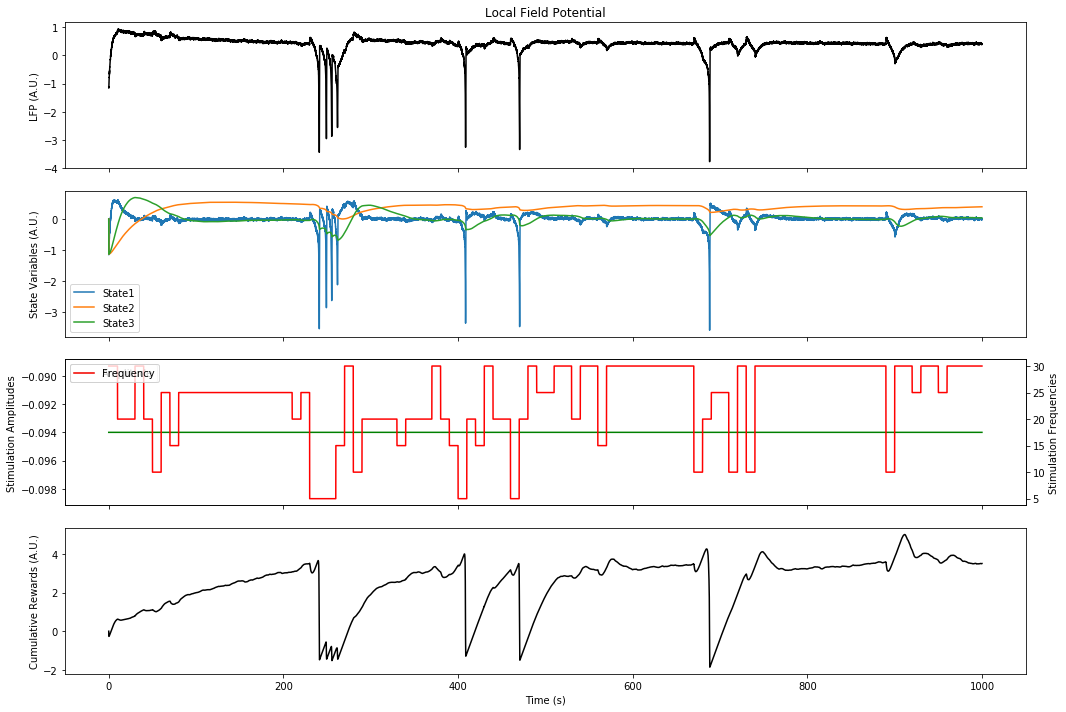

In [4]:
therapy_agent = Agent(num_states, num_actions)

env = Environment(MAX_TIME_STEPS, PERIOD, states, STIM_BLOCK_SAMPLES,
                      actions_df)

init_actions = actions_df.loc[np.random.randint(0, num_actions, 1), :]
env.run(therapy_agent, init_actions)

time_vec = np.linspace(0, MAX_TIME_STEPS * PERIOD, MAX_TIME_STEPS)

visualizations(time_vec, env.environment.lfp, env.environment.filter_state_1,
env.environment.filter_state_2, env.environment.filter_state_3,
env.stim_amplitudes, env.stim_frequencies, env.cumulative_rewards)